In [1]:

import torch
import torch.nn as nn
import torch.optim as optim

import matplotlib.pyplot as plt
from PIL import Image
import torchvision.transforms.functional as F


In [15]:
batch_size  = 48
channels = 1

def get_batch( n=batch_size, h=16, w=16, c=channels ) :
    return torch.rand( n, c, h, w )

def get_actual( n=batch_size, h=64, w=64, c=channels ) :
    rc = torch.zeros( n, c, h, w )
    for b in range(0,n ) :
        for x in range(w>>1, w-1 ) :
            for y in range(0,h-1 ) :
                #print([b,0,y,x])                
                rc[b,0,y,x] = 1.0 #(y+1)/h
    return rc

# custom weights initialization called on netG and netD
def weights_init(m):
    classname = m.__class__.__name__
    if classname.find('Conv') != -1:
        m.weight.data.normal_(0.0, 0.02)
    elif classname.find('BatchNorm') != -1:
        m.weight.data.normal_(1.0, 0.02)
        m.bias.data.fill_(0)


In [16]:
class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()

        self.main = nn.Sequential(
            nn.ConvTranspose2d( in_channels=1, out_channels=32, kernel_size=2, 
                          stride=2, padding=0, output_padding=0, bias=False ),
            nn.BatchNorm2d( 32 ),
            nn.ReLU(True),

            nn.ConvTranspose2d( in_channels=32, out_channels=1, kernel_size=2, 
                          stride=2, padding=0, output_padding=0, bias=False ),
            #nn.BatchNorm2d( 1 ),
            nn.ReLU(True)
        )
        self.apply( weights_init )

    def forward(self, x):
        return self.main( x )

In [17]:
net = Generator()
#criterion = nn.MSELoss( reduction='sum' )
criterion = nn.KLDivLoss() # reduction='sum' )
optimizer = optim.Adam( net.parameters(), lr=1e-2 ) 
actual = get_actual() 

losses = []

for b in range(0,30) :
    net.zero_grad()
    X = get_batch() 
    out = net.forward( X )
    error = criterion( out, actual ) 
    error.backward()
    losses.append( error )
    optimizer.step()

#print( error )

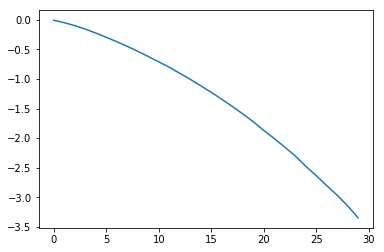

In [18]:
fig = plt.figure()
plt.plot( losses )

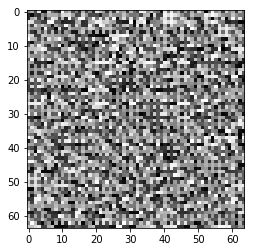

In [19]:
fig = plt.figure()
#local = X3 * 255.0
#local = local.type( torch.uint8 )


#n = min( 12, local.size(0) )
#for i in range(0, n ) :
#    sp = fig.add_subplot( 3, int((n-1)/2)+1, i+1 )     
#    image = F.to_pil_image( local[0] )
#    plt.imshow( image )


image = F.to_pil_image( out[0] ) #local[0] )
plt.imshow( image )

plt.show()


size_out = ( (h-1)*stride2+kernel_size, (w-1)*stride2+kernel_size )
print( size_out )